# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository. The first three columns denote different parameters obtained from the photographs of the banknotes and last colum provides the label. Frankly as the dataset does not have any description I don't know  which labels corresponds to real and which to counterfeited banknotes. let's assume that label one (positive) denotes the clounterfeits. The set  [banknote_authentication.csv](./data/banknote_authentication.csv) can be found in the `data`  directory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8)

Please insert you  firstname  and name below

In [4]:
from  sklearn.model_selection import train_test_split
seed = 31287

In [5]:
data = pd.read_csv('data/banknotes_data.csv')

In [6]:
data.head()

,a0,a1,a2,a3,counterfeit
0,-1.1306,1.8458,-1.35750,-1.38060,1
1,-1.1188,3.3357,-1.34550,-1.95730,1
2,2.6719,3.0646,0.37158,0.58619,0
3,-4.1409,3.4619,-0.47841,-3.88790,1
4,1.4507,8.7903,-2.23240,-0.65259,0


In [7]:
data.describe()

,a0,a1,a2,a3,counterfeit
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,0.431116,1.902054,1.426607,-1.220393,0.444254
std,2.845672,5.942260,4.397341,2.101777,0.497096
min,-7.042100,-13.773100,-5.286100,-7.871900,0.000000
25%,-1.770900,-1.916200,-1.664300,-2.466150,0.000000
50%,0.471345,2.408650,0.567365,-0.614450,0.000000
75%,2.816925,6.800675,3.338825,0.394810,1.000000
max,6.824800,12.730200,17.927400,2.449500,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a0           1166 non-null   float64
 1   a1           1166 non-null   float64
 2   a2           1166 non-null   float64
 3   a3           1166 non-null   float64
 4   counterfeit  1166 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 45.7 KB


In [9]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data.loc[:,'counterfeit'], random_state=seed)

In [10]:
data_train

,a0,a1,a2,a3,counterfeit
711,1.94760,-4.773800,8.52700,-1.866800,0
565,1.42760,8.384700,-2.09950,-1.967700,0
912,-4.28590,8.523400,3.13920,-0.916390,0
64,4.92490,0.689060,0.77344,1.209500,0
871,2.19480,1.378100,1.15820,0.857740,0
...,...,...,...,...,...
47,-2.45610,-4.556600,6.45340,-0.056479,1
1161,1.21380,8.798600,-2.16720,-0.741820,0
174,5.87820,5.940900,-2.85440,-0.608630,0
1119,0.17346,7.869500,0.26876,-3.788300,0


In [11]:
lbls_train = data_train['counterfeit']
lbls_test = data_test['counterfeit']

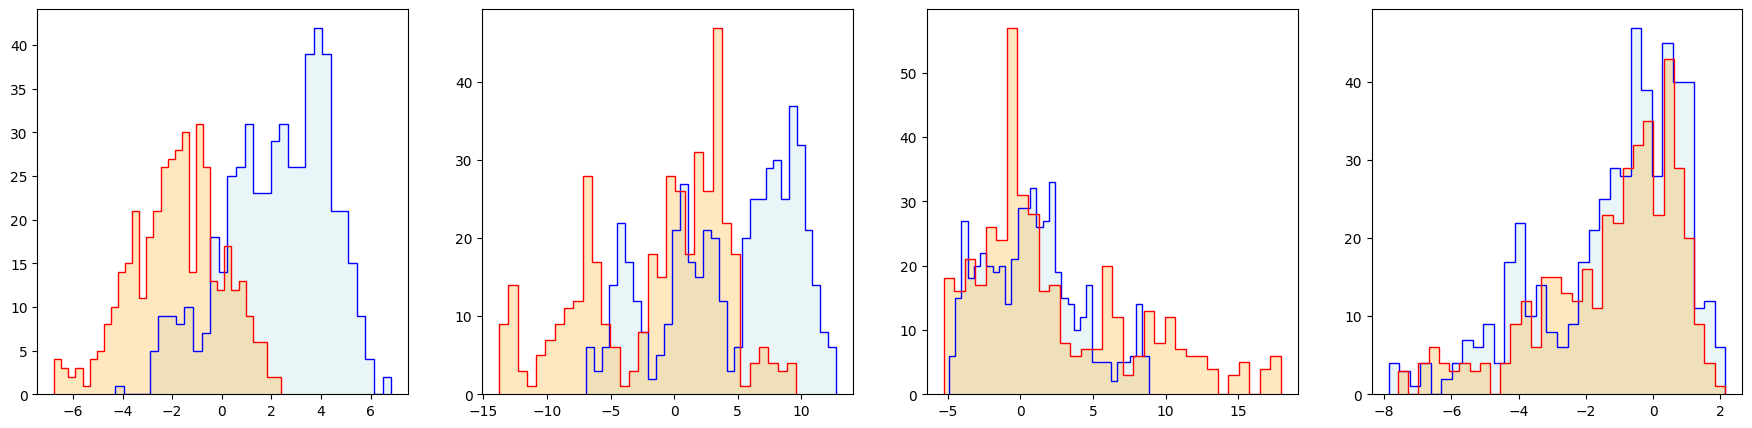

In [12]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
for i in range(4):
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='step', color='blue')
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='step', color='red')
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='bar', color='lightblue', alpha=0.25)
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='bar', color='orange', alpha =0.25)

## Problem 1

Using  the [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) function construct the  Gaussian  Bayes classifier using only one feature. Which feature will you choose? Calculate the confusion matrix (normalized as to show rates), ROC AUC score and plot ROC curve. Do this both for training and validation set. Plot both curves on the same plot.  

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import auc

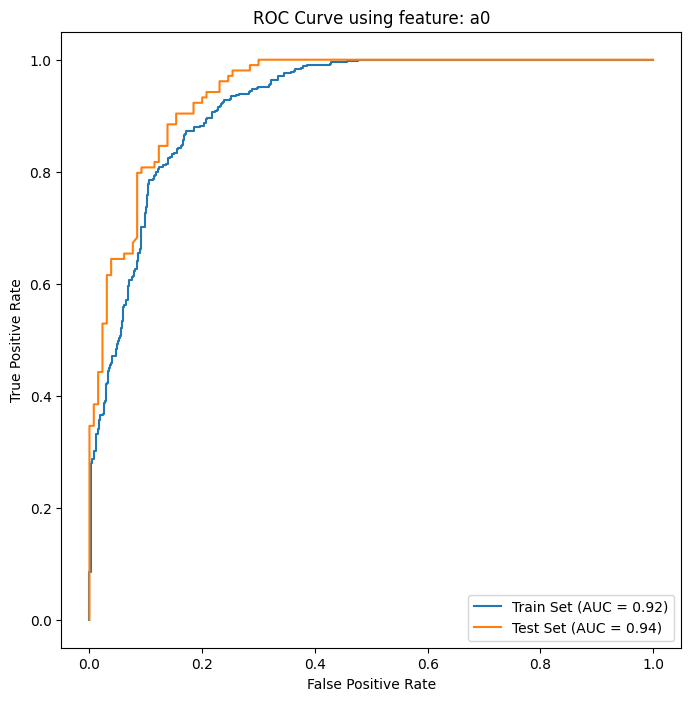

Train AUC: 0.92
Test AUC: 0.94
Normalized Confusion Matrix (Training Set):
[[0.85328185 0.14671815]
 [0.17149758 0.82850242]]
Normalized Confusion Matrix (Test Set):
[[0.87692308 0.12307692]
 [0.18269231 0.81730769]]


In [14]:
data = pd.read_csv('data/banknotes_data.csv')
seed = 31287
stratify_col = data['counterfeit']
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=stratify_col, random_state=seed)


lbls_train = data_train['counterfeit']
lbls_test = data_test['counterfeit']

gnb = GaussianNB()

best_feature = max(['a0', 'a1', 'a2', 'a3'], key=lambda feature: roc_auc_score(lbls_train, gnb.fit(data_train[[feature]], lbls_train).predict_proba(data_train[[feature]])[:, 1]))
gnb.fit(data_train[[best_feature]], lbls_train)

train_probs = gnb.predict_proba(data_train[[best_feature]])[:, 1]
test_probs = gnb.predict_proba(data_test[[best_feature]])[:, 1]
train_auc = roc_auc_score(lbls_train, train_probs)
test_auc = roc_auc_score(lbls_test, test_probs)

train_fpr, train_tpr, _ = roc_curve(lbls_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(lbls_test, test_probs)
plt.plot(train_fpr, train_tpr, label=f'Train Set (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test Set (AUC = {test_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve using feature: {best_feature}')
plt.legend(loc='lower right')
plt.show()

print(f'Train AUC: {train_auc:.2f}')
print(f'Test AUC: {test_auc:.2f}')

cm_train = confusion_matrix(lbls_train, gnb.predict(data_train[[best_feature]]), normalize='true')
cm_test = confusion_matrix(lbls_test, gnb.predict(data_test[[best_feature]]), normalize='true')
print("Normalized Confusion Matrix (Training Set):")
print(cm_train)
print("Normalized Confusion Matrix (Test Set):")
print(cm_test)

__Hint__ For calculating metrics and plotting ROC curves you may use functions from scikit-learn: `roc_curve`, `roc_auc_score` and `confusion matrix`. For estimating normal distribution parameters  use `norm.fit` `from scipy.stats`. Use `norm.pdf` for normal probability density function.

In [15]:
data_train

,a0,a1,a2,a3,counterfeit
711,1.94760,-4.773800,8.52700,-1.866800,0
565,1.42760,8.384700,-2.09950,-1.967700,0
912,-4.28590,8.523400,3.13920,-0.916390,0
64,4.92490,0.689060,0.77344,1.209500,0
871,2.19480,1.378100,1.15820,0.857740,0
...,...,...,...,...,...
47,-2.45610,-4.556600,6.45340,-0.056479,1
1161,1.21380,8.798600,-2.16720,-0.741820,0
174,5.87820,5.940900,-2.85440,-0.608630,0
1119,0.17346,7.869500,0.26876,-3.788300,0


## Problem 2

Same as Problem 1 but now construct Gaussian Naive Bayes using two features. Additionally  compare ROC curve obtained with this and previous  classifier on the test set. What is the improvement of AUC score on the test set?

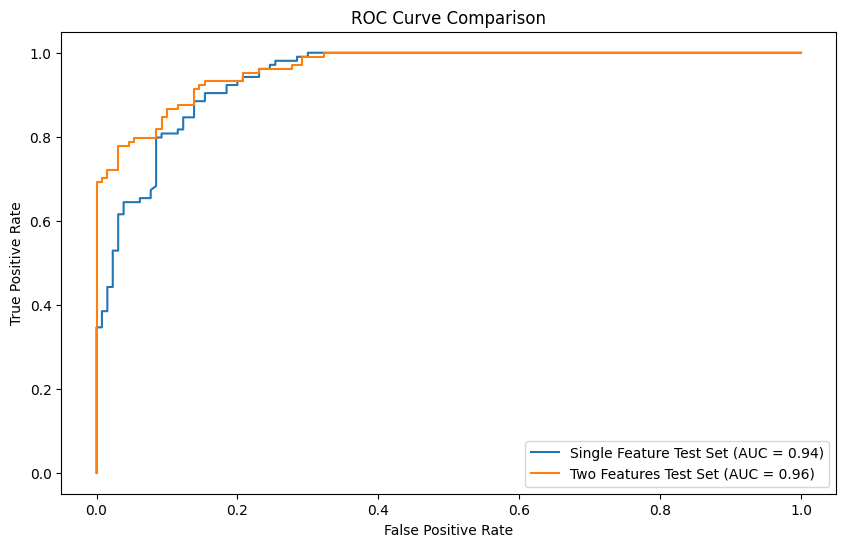

Improvement in AUC score is: 0.02


In [16]:
best_features = None
best_auc_test = 0

for features in itertools.combinations(['a0', 'a1', 'a2', 'a3'], 2):
    gnb.fit(data_train[list(features)], lbls_train)
    test_probs = gnb.predict_proba(data_test[list(features)])[:, 1]
    auc_test = roc_auc_score(lbls_test, test_probs)
    if auc_test > best_auc_test:
        best_auc_test = auc_test
        best_features = features

gnb.fit(data_train[list(best_features)], lbls_train)

test_probs_best_features = gnb.predict_proba(data_test[list(best_features)])[:, 1]
test_auc_best_features = roc_auc_score(lbls_test, test_probs_best_features)
test_fpr_best_features, test_tpr_best_features, _ = roc_curve(lbls_test, test_probs_best_features)

plt.figure(figsize=(10, 6))
plt.plot(test_fpr, test_tpr, label=f'Single Feature Test Set (AUC = {test_auc:.2f})')
plt.plot(test_fpr_best_features, test_tpr_best_features, label=f'Two Features Test Set (AUC = {test_auc_best_features:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

auc_improvement = test_auc_best_features - test_auc
print(f'Improvement in AUC score is: {auc_improvement:.2f}')

## Problem 3

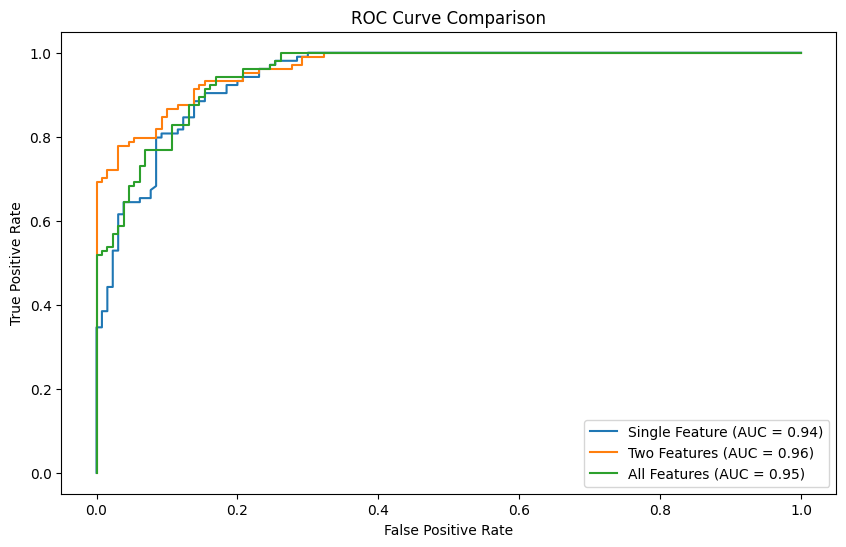

Single Feature Test AUC: 0.94
Two Features Test AUC: 0.96
All Features Test AUC: 0.95
Normalized Confusion Matrix (Test Set) using all features:
[[0.89230769 0.10769231]
 [0.20192308 0.79807692]]


In [18]:
gnb.fit(data_train[['a0', 'a1', 'a2', 'a3']], lbls_train)

test_probs_all_features = gnb.predict_proba(data_test[['a0', 'a1', 'a2', 'a3']])[:, 1]
test_auc_all_features = roc_auc_score(lbls_test, test_probs_all_features)

test_fpr_all_features, test_tpr_all_features, _ = roc_curve(lbls_test, test_probs_all_features)

plt.figure(figsize=(10, 6))
plt.plot(test_fpr, test_tpr, label=f'Single Feature (AUC = {test_auc:.2f})')
plt.plot(test_fpr_best_features, test_tpr_best_features, label=f'Two Features (AUC = {test_auc_best_features:.2f})')
plt.plot(test_fpr_all_features, test_tpr_all_features, label=f'All Features (AUC = {test_auc_all_features:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

print(f'Single Feature Test AUC: {test_auc:.2f}')
print(f'Two Features Test AUC: {test_auc_best_features:.2f}')
print(f'All Features Test AUC: {test_auc_all_features:.2f}')

cm_test_all_features = confusion_matrix(lbls_test, gnb.predict(data_test[['a0', 'a1', 'a2', 'a3']]), normalize='true')
print("Normalized Confusion Matrix (Test Set) using all features:")
print(cm_test_all_features)